## Data Processing for Sensor Measurement
*Written by Ming-Hao Cheng*

### (0) Load Libraries

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import io
data_upload = files.upload() # select data to upload

Saving cumulus_basal07082022_peak.xlsx to cumulus_basal07082022_peak.xlsx


### (1) Import Raw Data
1. Copy the file name and put it in the parentheses 
2. Data will be plotted by the second line of the code

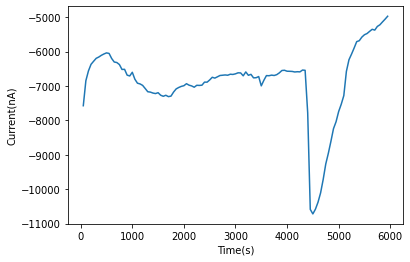

In [33]:
data = pd.read_excel(io.BytesIO(data_upload['cumulus_basal07082022_peak.xlsx']))
plt.plot(data.time,data.current)
plt.ylabel('Current(nA)')
plt.xlabel('Time(s)')
plt.show()

### (2) Define Windows for Baseline and Basal Measurements
1. Set up the window size in sec for baseline measurement in the first two lines
2. Set up the window size in sec for basal measurement in line 3 and line 4

In [36]:
baseline_start = 3950
baseline_end = 4350
basal_start = 5650
basal_end = 5900

def index_finder(func, time):
    ctr = 0
    for i in func:
        if i >= time:
            return ctr
        ctr += 1
    return False

t1 = index_finder(data.time,baseline_start)
t2 = index_finder(data.time,baseline_end)
t3 = index_finder(data.time,basal_start)
t4 = index_finder(data.time,basal_end)
print(t1,t2,t3,t4)

78 86 112 117


### (3) Data Conversion and Visualization
No need to do anything in this step. Results will be shown below after running this cell. <br>
Window size can be redefined in step (2). <br>
Data conversion method taken from Cheng, Ming-Hao, et al. "Analysis of mitochondrial oxygen consumption and hydrogen peroxide release from cardiac mitochondria using electrochemical multi-sensors." Sensors and Actuators B: Chemical 360 (2022): 131641.

Baseline slope:  1.81233333333281e-05  uA/s
Basal slope:  0.0012774400000000034  uA/s
OCR:  21.357468871634502  fmol/s


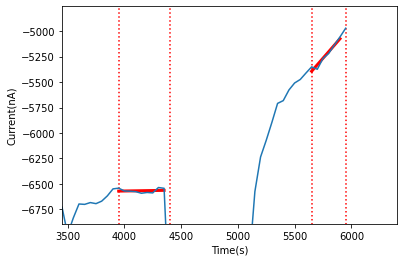

In [37]:
# curve fitting
baseline_coeff = np.polyfit(data.time[t1:t2+1], data.current[t1:t2+1], 1)
baseline_fit = np.polyval(baseline_coeff,data.time[t1:t2+1])
basal_coeff = np.polyfit(data.time[t3:t4+1], data.current[t3:t4+1], 1)
basal_fit = np.polyval(basal_coeff,data.time[t3:t4+1])
print("Baseline slope: ",baseline_coeff[0]/1000," uA/s")
print("Basal slope: ",basal_coeff[0]/1000," uA/s")
# sensor parameters
area = 2070198.15 # O2 electrode with wide traces area in um^2
calibration_curve = 14.648 # nA/uM
cell_height = 120 # um
# data conversion
slope = (basal_coeff[0] - baseline_coeff[0])*1000000 # fA/s
results = area*cell_height*slope*(1/calibration_curve/0.000000001/1000000000000000*0.000001) # fmol/s
print("OCR: ",results," fmol/s")
# plot results: baseline
plt.plot(data.time[t1:t2+1],baseline_fit,'r',linewidth=3) # plot baseline fitted line
plt.vlines(data.time[t1],min(data.current),max(data.current)+500,color='red',linestyle='dotted')
plt.vlines(data.time[t2+1],min(data.current),max(data.current)+500,color='red',linestyle='dotted')
# plot results: basal
plt.plot(data.time[t3:t4+1],basal_fit,'r',linewidth=3) # plot basal fitted line
plt.vlines(data.time[t3],min(data.current),max(data.current)+500,color='red',linestyle='dotted')
plt.vlines(data.time[t4+1],min(data.current),max(data.current)+500,color='red',linestyle='dotted')

plt.plot(data.time,data.current) # plot original data
plt.ylabel('Current(nA)')
plt.xlabel('Time(s)')
ylimit_max1 = max(data.current[t1:t2+1])
ylimit_max2 = max(data.current[t3:t4+1])
ylimit_min1 = min(data.current[t1:t2+1])
ylimit_min2 = min(data.current[t3:t4+1])
ylimit_max = max(ylimit_max1,ylimit_max2)
ylimit_min = min(ylimit_min1,ylimit_min2)
plt.ylim([ylimit_min-300,ylimit_max+300])
plt.xlim([data.time[t1]-500,data.time[t4]+500])
plt.show()